In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix,
    classification_report, RocCurveDisplay
)

In [44]:
theta_vector = np.array([-25,1,2])

np.random.seed(10)
x1_inputs = np.random.uniform(-10, 10, size=100)
np.random.seed(100)
x2_inputs = np.random.uniform(-10, 10, size=100)

row_list = []
labels = []

for x1,x2 in zip(x1_inputs,x2_inputs):
    x_i_vector = np.array([1,x1,x2])
    row_list.append(x_i_vector)
    
    hypothesis_prediction = np.dot(theta_vector, x_i_vector)
    if hypothesis_prediction >= 25:
        labels.append(1)
    else:
        labels.append(0)

In [45]:
design_matrix = np.array(row_list)
data = pd.DataFrame(row_list, columns=['intercept','x1','x2'])
data['x1_squared'] = data['x1']**2
data['x2_squared'] = data['x2']**2
data['label'] = ((data['x1_squared'] + data['x2_squared']) >= 50).astype(int)
np.random.seed(123)
test_ids = np.random.choice(np.arange(0, data.shape[0]), size=int(.20*data.shape[0]), replace=False)
test_data = data[data.index.isin(test_ids)]
training_data = data[~data.index.isin(test_ids)]


In [46]:
test_data['type'] = 'test'
training_data['type'] = 'train'

full_data = pd.concat([test_data,training_data])



<ipython-input-46-c444f6dbfa45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['type'] = 'test'
<ipython-input-46-c444f6dbfa45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['type'] = 'train'


In [47]:
feature_cols = ['x1', 'x2', 'x1_squared', 'x2_squared']

X_train = training_data[feature_cols].values
y_train = training_data['label'].astype(int).values
X_test  = test_data[feature_cols].values
y_test  = test_data['label'].astype(int).values


array([[-9.58496101e+00, -4.43261230e+00,  9.18714776e+01,
         1.96480518e+01],
       [ 2.67296470e+00, -1.50964819e+00,  7.14474028e+00,
         2.27903764e+00],
       [ 4.97607765e+00,  6.89552265e+00,  2.47613488e+01,
         4.75482326e+01],
       [-6.03874270e+00,  3.41498169e+00,  3.64664135e+01,
         1.16621000e+01],
       [ 5.21061424e+00,  6.51705510e+00,  2.71505008e+01,
         4.24720072e+01],
       [-8.23320372e+00,  1.50186659e+00,  6.77856434e+01,
         2.25560325e+00],
       [ 3.70719637e+00,  7.82643909e+00,  1.37433049e+01,
         6.12531488e+01],
       [ 9.06786692e+00, -5.81595756e+00,  8.22262105e+01,
         3.38253623e+01],
       [-9.92103467e+00, -6.29343561e+00,  9.84269290e+01,
         3.96073318e+01],
       [ 2.43845268e-01, -7.83246219e+00,  5.94605146e-02,
         6.13474640e+01],
       [ 6.25241923e+00, -5.60605015e+00,  3.90927463e+01,
         3.14277983e+01],
       [ 2.25052134e+00,  9.57247569e+00,  5.06484629e+00,
      

In [48]:
print("Overall:", data['label'].value_counts().to_dict())
print("Train  :", training_data['label'].value_counts().to_dict())
print("Test   :", test_data['label'].value_counts().to_dict())

Overall: {1: 55, 0: 45}
Train  : {1: 43, 0: 37}
Test   : {1: 12, 0: 8}


In [53]:
logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

knn = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=3, weights='distance'))
])

In [54]:
logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 KNeighborsClassifier(n_neighbors=3, weights='distance'))])

In [55]:
lr_pred  = logreg.predict(X_test)
lr_proba = logreg.predict_proba(X_test)[:, 1]
print("\n=== Logistic Regression ===")
print("Accuracy:", round(accuracy_score(y_test, lr_pred), 4))
print("ROC AUC :", round(roc_auc_score(y_test, lr_proba), 4))
print("Confusion matrix:\n", confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred, digits=3))


=== Logistic Regression ===
Accuracy: 1.0
ROC AUC : 1.0
Confusion matrix:
 [[ 8  0]
 [ 0 12]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         8
           1      1.000     1.000     1.000        12

    accuracy                          1.000        20
   macro avg      1.000     1.000     1.000        20
weighted avg      1.000     1.000     1.000        20



In [58]:
knn_pred  = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)[:, 1]
print("\n=== KNN (k=3, distance weights) ===")
print("Accuracy:", round(accuracy_score(y_test, knn_pred), 4))
print("ROC AUC :", round(roc_auc_score(y_test, knn_proba), 4))
print("Confusion matrix:\n", confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred, digits=3))


=== KNN (k=3, distance weights) ===
Accuracy: 0.95
ROC AUC : 0.9792
Confusion matrix:
 [[ 7  1]
 [ 0 12]]
              precision    recall  f1-score   support

           0      1.000     0.875     0.933         8
           1      0.923     1.000     0.960        12

    accuracy                          0.950        20
   macro avg      0.962     0.938     0.947        20
weighted avg      0.954     0.950     0.949        20



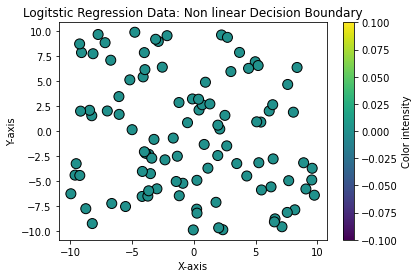

In [59]:
# Create the scatter plot
plt.scatter(x1_inputs, x2_inputs, c=labels, cmap='viridis', s=100, edgecolor='k')

# Add a color bar
plt.colorbar(label='Color intensity')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Logitstic Regression Data: Non linear Decision Boundary')

# Show the plot
plt.show()